# Weak Learners
Weak learners are models that perform slightly better than random guessing.

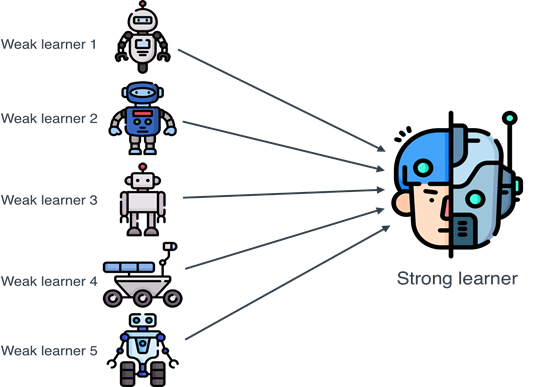
*Source: Mehmet Akturk*

**Ensemble Learning is based on weak learners.**

### On a lighter note

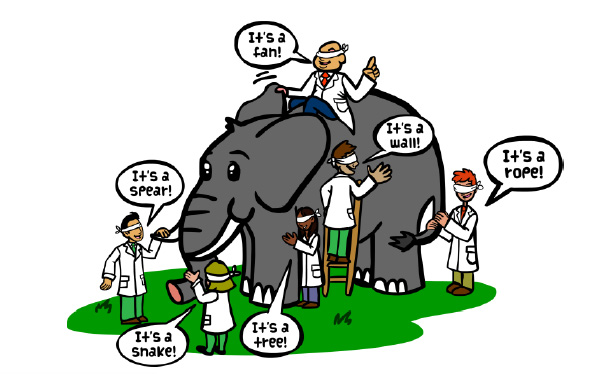

# Most Common Ensemble Learning Strategies
* Bagging
* Boosting
* Model Stacking
* Voting Ensemble

## Bagging: BaggingClassifier
A Bagging Classifier is an ensemble learning method that combines the predictions from multiple base classifiers to improve overall performance and reduce overfitting. Bagging stands for "Bootstrap Aggregating," and the idea behind it is to train each base classifier on a different bootstrap sample of the training data.

### Theory: Let's understand the terms!

* **Base Classifier or Weak Learner**:
The base classifier is the individual model used as a building block within the ensemble. Each base model is independently trained. It can be any machine learning algorithm capable of making predictions, such as decision trees, support vector machines, or neural networks. Think about the weak learners in the earlier image!

* **Bootstrap Sampling**:
This involves creating multiple subsets of the training data through bootstrap sampling. Bootstrap sampling is a random sampling technique with replacement, meaning that each sample in the subset can appear more than once, while others may not appear at all.
 * Sampling with Replacement: When creating a bootstrap sample, each instance from the original training dataset has the chance to be included more than once or not at all in the new sample. This means that some instances may appear multiple times, while others may be left out.
 * Same Size as Original Dataset: The size of the bootstrap sample is typically the same as the size of the original dataset. In practice, this means that the new sample will contain some instances from the original dataset multiple times and may not include others.

```
Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Bootstrap Sample 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]

Bootstrap Sample 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7]

Bootstrap Sample 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]
```



* **Base Model Training**:
Each base classifier is trained on a different bootstrap sample of the training data. This introduces diversity among the base models, as they are exposed to slightly different versions of the dataset. To make this computationally efficient and less time-consuming, the base models can be trained in parallel.

* **Voting or Averaging**: During the prediction phase, each base classifier makes individual predictions. The final prediction of the Bagging Classifier is typically determined by aggregating these individual predictions. (For classification tasks, a majority voting scheme is commonly used, while for regression tasks, predictions may be averaged.)

Random Forest is a widely used Bagging Classifier, where the base classifiers are decision trees. Random Forest introduces additional randomness by considering only a subset of features (input columns) at each split in the decision tree construction.


### Code: A small example

In [ ]:
help(BaggingClassifier)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
df = load_breast_cancer()
X, y = df.data, df.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_model_dt = DecisionTreeClassifier(random_state=42)
base_model_svm = SVC(random_state=42)
base_model_knn = KNeighborsClassifier()

# Train and evaluate base DT model
base_model_dt.fit(X_train, y_train)
predictions_dt = base_model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')

# Train and evaluate base SVM model
base_model_svm.fit(X_train, y_train)
predictions_svm = base_model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'Accuracy of SVM: {accuracy_svm:.4f}')

# Train and evaluate base KNN model
base_model_knn.fit(X_train, y_train)
predictions_knn = base_model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f'Accuracy of KNN: {accuracy_knn:.4f}')


# Define and train Bagging Classifier with KNNC
bagging_model_dt = BaggingClassifier(base_model_svm, n_estimators=1000, verbose=2)
bagging_model_dt.fit(X_train, y_train)
predictions_bagging_dt = bagging_model_dt.predict(X_test)
accuracy_bagging_dt = accuracy_score(y_test, predictions_bagging_dt)
print(f'Accuracy of Bagging with SVM: {accuracy_bagging_dt:.4f}')

Accuracy of Decision Tree: 0.9474
Accuracy of SVM: 0.9474
Accuracy of KNN: 0.9561
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 1000)...
Building estimator 14 of 1000 for this para

## Boosting: AdaBoost
Adaboost, short for Adaptive Boosting, is, again, an ensemble learning method that combines the predictions of multiple weak learners to create a strong learner. The key idea behind Adaboost is to focus on the misclassified instances during training, assigning them higher weights in subsequent iterations. This adaptive weight assignment allows Adaboost to give more attention to difficult-to-classify examples, ultimately improving the overall model performance.


### Theory: Let's learn the terms first

* **Base Model**: Adaboost starts with a base model - a weak learner, which is a model that performs slightly better than random guessing. Common examples of weak learners include shallow decision trees (stumps) or models with low complexity. The choice of a weak learner depends on the problem at hand, but it's ***essential that the weak learner performs better than random chance.***

* **Weighted Training**: Each instance in the training set is initially assigned equal weights. In each iteration, a weak learner is trained on the current training set. Instances that are misclassified by the model receive higher weights. Subsequent weak learners focus more on the misclassified instances, adjusting the model's attention to the most challenging examples.

* **Weighted Voting/Boosted Prediction:** After training a weak learner, its weight is determined based on its accuracy. More accurate base models receive higher weights in the final ensemble.
The weight of each weak learner influences their contribution to the final prediction during testing.

* **Adaptive Learning Rate**: Adaboost introduces an adaptive learning rate that controls the contribution of each weak learner. The learning rate ensures that the ensemble doesn't become overly complex. A lower learning rate may prevent overfitting, but it requires more iterations to converge.


### Code: A small example

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Step 1: Load the MNIST dataset using Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img1 = X_train[0]
img1.reshape(img1.shape[0], -1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Step 1: Load the MNIST dataset using Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the 2D images into 1D arrays to allow model to take them as input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Step 2: Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Step 3: Define the base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(max_depth=2, random_state=42)  # Using a shallow decision tree as a weak learner

# Step 4: Define the AdaBoostClassifier with the base model
adaboost_model = AdaBoostClassifier(base_model, n_estimators=200, random_state=42)

# Step 5: Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train, y_train)

# Step 6: Make predictions on the validation data
predictions = adaboost_model.predict(X_val)

# Step 7: Evaluate the performance of the ensemble on validation data
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy of AdaBoost on MNIST (Validation): {accuracy:.4f}')

# Step 8: Make predictions on the test data
predictions_test = adaboost_model.predict(X_test_flat)

# Step 9: Evaluate the performance of the ensemble on test data
accuracy_test = accuracy_score(y_test, predictions_test)
print(f'Accuracy of AdaBoost on MNIST (Test): {accuracy_test:.4f}')

Accuracy of AdaBoost on MNIST (Validation): 0.7558
Accuracy of AdaBoost on MNIST (Test): 0.7515


## Stacking: StackingRegressor
Stacking is an ensemble learning technique that combines the predictions of multiple base models using a meta-model (also known as a combiner or blender). In the context of regression, the stacking regressor combines the predictions of individual regression models to create a more accurate and robust overall prediction.

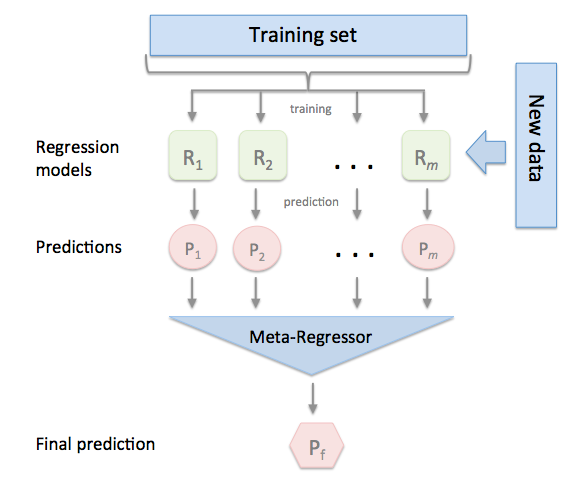

*Source: Mixtend*

### Theory - Let's understand the terms!
* **Base Models:** Stacking begins with the selection of multiple base regression models. These can be diverse models with different strengths and weaknesses. Common choices include linear regression, decision trees, random forests, support vector machines, and gradient boosting.
* **Splitting the Dataset:** The dataset is split into training and testing sets. The training set is used to train the base models, and the testing set is used to evaluate their individual performances and the overall stacking model.
* **Training the Base Models:** Each base model is trained on the training set independently. The idea is to let each model learn different patterns and capture diverse aspects of the data.
* **Generating Base Model Predictions:** After training, each base model makes predictions on the testing set. These predictions serve as the input features for the meta-model.
* **Meta-Model (Stacking Regressor):** A meta-model, often a simpler model (e.g., linear regression), is trained on the predictions of the base models. The meta-model takes the base models' predictions as input features and learns how to combine them to make a final prediction.
* **Stacking Process:** During the stacking process, the meta-model is trained to minimize the error between its predictions and the true target values on the testing set. The goal is to find the optimal combination of base model predictions.
* **Making Predictions:** Once the stacking model is trained, it can be used to make predictions on new, unseen data. The predictions are generated by passing the input features through the trained base models and then combining those predictions using the trained meta-model.

### Code: A small example

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Step 1: Load the Boston Housing Prices dataset from source -  https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X,y = data, target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 3: Define base models
base_model1 = RandomForestRegressor(random_state=42)
base_model2 = GradientBoostingRegressor(random_state=42)
base_model3 = LinearRegression()

# Step 4: Train and evaluate individual base models
base_model1.fit(X_train, y_train)
predictions_base1 = base_model1.predict(X_test)
mse_base1 = mean_squared_error(y_test, predictions_base1)
print(f'Mean Squared Error for Random Forest: {mse_base1:.4f}')

base_model2.fit(X_train, y_train)
predictions_base2 = base_model2.predict(X_test)
mse_base2 = mean_squared_error(y_test, predictions_base2)
print(f'Mean Squared Error for Gradient Boosting: {mse_base2:.4f}')

base_model3.fit(X_train, y_train)
predictions_base3 = base_model3.predict(X_test)
mse_base3 = mean_squared_error(y_test, predictions_base3)
print(f'Mean Squared Error for Linear Regression: {mse_base3:.4f}')

# Step 5: Define the meta-model (final estimator)
meta_model = SVR()

# Step 6: Create the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[('rf', base_model1), ('gb', base_model2), ('lr', base_model3)], # base models
    final_estimator=meta_model # meta model (combiner, blender, final estimator)
)

# Step 7: Train the Stacking Regressor
stacking_model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
predictions_stacked = stacking_model.predict(X_test)

# Step 9: Evaluate performance using Mean Squared Error for the Stacked Model
mse_stacked = mean_squared_error(y_test, predictions_stacked)
print(f'Mean Squared Error for Stacking Model: {mse_stacked:.4f}')

Mean Squared Error for Random Forest: 7.9015
Mean Squared Error for Gradient Boosting: 6.2089
Mean Squared Error for Linear Regression: 24.2911
Mean Squared Error for Stacking Model: 6.8565


# Homework: VotingClassifier

A Voting Classifier is an ensemble method that combines the predictions from multiple machine learning models and predicts the class label by majority vote (for classification) or the average (for regression). In this example, I'll use the digits dataset from scikit-learn and demonstrate a Voting Classifier with three different classifiers: Logistic Regression, Decision Tree, and Support Vector Machine (SVM).

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define individual classifiers
logistic_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # Note: probability=True for soft voting

# Step 4: Fit individual classifiers
logistic_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Step 5: Define the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', logistic_clf), ('dt', tree_clf), ('svm', svm_clf)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on class probabilities
)

# Step 6: Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Step 7: Make predictions on the test set
predictions_logistic = logistic_clf.predict(X_test)
predictions_tree = tree_clf.predict(X_test)
predictions_svm = svm_clf.predict(X_test)
predictions_voting = voting_clf.predict(X_test)

# Step 8: Compare accuracy of individual models and the Voting Classifier
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
accuracy_tree = accuracy_score(y_test, predictions_tree)
accuracy_svm = accuracy_score(y_test, predictions_svm)
accuracy_voting = accuracy_score(y_test, predictions_voting)

print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_tree:.4f}')
print(f'Accuracy of Support Vector Machine: {accuracy_svm:.4f}')
print(f'Accuracy of Voting Classifier: {accuracy_voting:.4f}')

# Print classification report for the Voting Classifier
print('\nClassification Report for Voting Classifier:')
print(classification_report(y_test, predictions_voting))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Logistic Regression: 0.9694
Accuracy of Decision Tree: 0.8417
Accuracy of Support Vector Machine: 0.9861
Accuracy of Voting Classifier: 0.9722

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.89      1.00      0.94        34
           4       0.98      0.98      0.98        46
           5       0.98      0.94      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

